### Ernie Sumoso Vicuna
### ID: 881591
### Week 11

1- Detect if a text is positive or negative sentiment

Input :

text="It was a very pleasant day"

Desired Output:

Sentiment(polarity=0.9533333333333333, subjectivity=1.0)
Positive

In [8]:
# !pip install vaderSentiment
text = "It was a very pleasant day"

In [20]:
# Solution Approach 1 (using vaderSentiment)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def get_sentiment_1(text, display_=True):
    analyzer = SentimentIntensityAnalyzer()
    scores_dict = analyzer.polarity_scores(text)
    if display_: display(scores_dict)
    print("Positive" if scores_dict['compound'] > 0.5 else "Negative")
    
get_sentiment_1(text)

{'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.5563}

Positive


In [21]:
# Solution Approach 2 (using TextBlob)
from textblob import TextBlob

def get_sentiment_2(text, display_=True):
    blob = TextBlob(text)
    if display_: display(blob.sentiment)
    print("Positive" if blob.sentiment.polarity > 0 else "")

get_sentiment_2(text)

Sentiment(polarity=0.9533333333333333, subjectivity=1.0)

Positive


2- How to use the Word2Vec model for representing words?

Extract the word vector representation of the word using word2vec model

Input :

texts= [" Photography is an excellent hobby to pursue ",
        " Photographers usually develop patience, calmnesss"
        " You can try Photography with any good mobile too"]
        
Desired Output:

 array([ 2.94046826e-03, -1.31368915e-05, -3.43682081e-03, -3.73885059e-03,
        2.49790819e-03, -1.23431312e-03, -9.60227044e-04,  2.31345627e-03,
       -4.97973803e-03,  2.09524506e-03,  2.00997619e-03, -4.10459843e-03,
        8.42132606e-04, -2.70003616e-03,  3.12150107e-03,  1.23607670e-03,
        2.16376456e-03,  5.02903073e-04, -3.72780557e-03,  4.35266597e-03,
       -1.80016900e-03,  3.42973252e-03, -2.12087762e-03,  1.14531387e-04,
        3.03449039e-03, -8.75897415e-04, -3.50620854e-03,  5.10322629e-03,
        ...(truncated)
        
Positive

In [73]:
from nltk import word_tokenize
from gensim.models import Word2Vec

texts = [" Photography is an excellent hobby to pursue ",
         " Photographers usually develop patience, calmnesss",
         " You can try Photography with any good mobile too"]

def tokenize_docs(docs):
    return [word_tokenize(doc) for doc in docs]
    
def get_word_vector_from_docs(docs, word):
    docs_tokenized = tokenize_docs(docs)
    model = Word2Vec(docs_tokenized, min_count=1)
    return model.wv[word]

get_word_vector_from_docs(texts, "excellent")

array([-0.00713902,  0.00124103, -0.00717672, -0.00224462,  0.0037193 ,
        0.00583312,  0.00119818,  0.00210273, -0.00411039,  0.00722533,
       -0.00630704,  0.00464722, -0.00821997,  0.00203647, -0.00497705,
       -0.00424769, -0.00310898,  0.00565521,  0.0057984 , -0.00497465,
        0.00077333, -0.00849578,  0.00780981,  0.00925729, -0.00274233,
        0.00080022,  0.00074665,  0.00547788, -0.00860608,  0.00058446,
        0.00686942,  0.00223159,  0.00112468, -0.00932216,  0.00848237,
       -0.00626413, -0.00299237,  0.00349379, -0.00077263,  0.00141129,
        0.00178199, -0.0068289 , -0.00972481,  0.00904058,  0.00619805,
       -0.00691293,  0.00340348,  0.00020606,  0.00475375, -0.00711994,
        0.00402695,  0.00434743,  0.00995737, -0.00447374, -0.00138926,
       -0.00731732, -0.00969783, -0.00908026, -0.00102275, -0.00650329,
        0.00484973, -0.00616403,  0.00251919,  0.00073944, -0.00339215,
       -0.00097922,  0.00997913,  0.00914589, -0.00446183,  0.00

3- How to visualize the word embedding obtained from word2Vec model ?

Implement Word embedding on the given texts and visualize it

texts= [" Photography is an excellent hobby to pursue ",
        " Photographers usually develop patience, calmnesss"
        " You can try Photography with any good mobile too"]
        
Output: plot

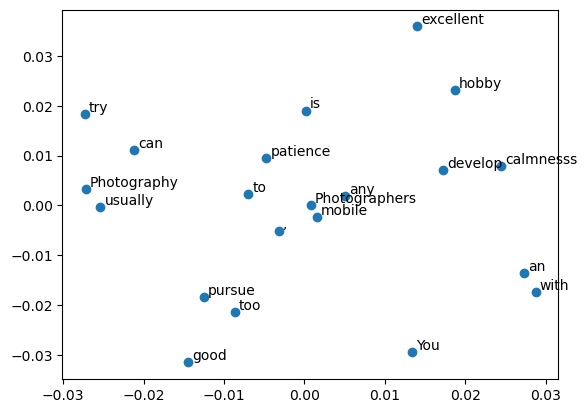

In [119]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

def plot_word_embedding_from_word2vec(docs, offset=0.0005):
    # get pca results
    model = Word2Vec(tokenized_docs, min_count=1)
    vectors = model.wv.vectors
    words = [model.wv.index_to_key[i] for i in range(len(vectors))]
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(vectors)

    # plot and annotate the word vectors
    pyplot.scatter(pca_result[:, 0], pca_result[:, 1])
    for i, word in enumerate(words):
        pyplot.annotate(word, xy=(pca_result[i, 0] + offset, pca_result[i, 1] + offset))
    pyplot.show()
    
tokenized_docs = tokenize_docs(texts)
plot_word_embedding_from_word2vec(tokenized_docs)